# Two-qubit operations
A single qubit doesn't do anything which couldn't be achieved with a classical analog computer and if we just added more qubits we wouldn't achieve anything quantum unless we let the qubits interact in a quantum mechanical way.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_distribution, plot_histogram, array_to_latex
from qiskit.result import Result
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import Aer
from math import sqrt, pi

### use vector_to_latex code from qiskit 0.44
from vector_to_latex import *

q_0: 
     
q_1:

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

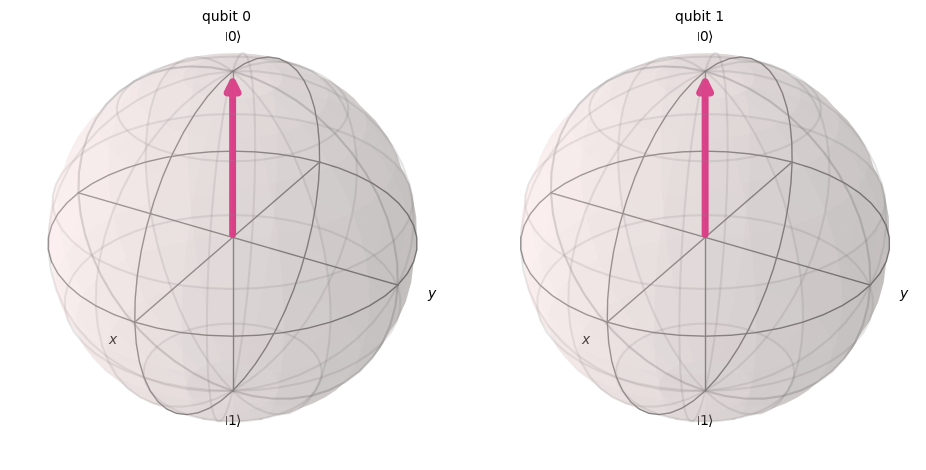

In [4]:
qc = QuantumCircuit(2)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output='latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output="bloch"))

Notice the statevector now has four components, but with both qubits initially in $| 0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ the initial state is given by $$| 0 \rangle \otimes | 0 \rangle =  \begin{bmatrix} 1 \times \begin{bmatrix} 1 \\ 0 \end{bmatrix} \\ 0 \times \begin{bmatrix} 1 \\ 0 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$

In general
$$ |a\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} $$

$$ 
|ba\rangle = |b\rangle \otimes |a\rangle = \begin{bmatrix} b_0 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\ b_1 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{bmatrix}
$$

In this case the state is separable, i.e. it makes sense to describe it in terms of the independent states of the two qubits. This means we could write the state combining $q_0$ and $q_1$ as $|q_1\rangle \otimes |q_0 \rangle =  |q_1 q_0 \rangle$ which in this case is just $|0 0 \rangle$.

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

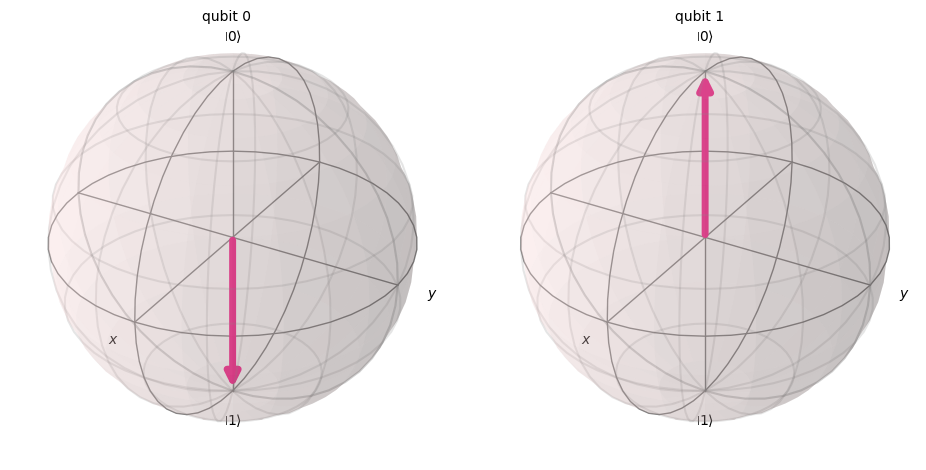

<IPython.core.display.Latex object>

In [8]:
#apply a gate to one of the qubits, example: X on qubit 0
qc = QuantumCircuit(2)
qc.x(0)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output='latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output= 'bloch'))
#we flipped qubit 0 not 1 as expected, The unitary matrix of this circuit looks like:
unitary = Operator(qc).data
display(array_to_latex(unitary, prefix="U = "))

The circuit is performing
$$
    I|q_1\rangle\otimes X |q_0\rangle = (I \otimes X)|q_1q_0\rangle
$$
its unitary matrix can be visualized as
$$
    I\otimes X = \begin{bmatrix} X & 0 \\ 0& X \end{bmatrix}
$$

and if instead we applied the $X$ to the other qubit

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

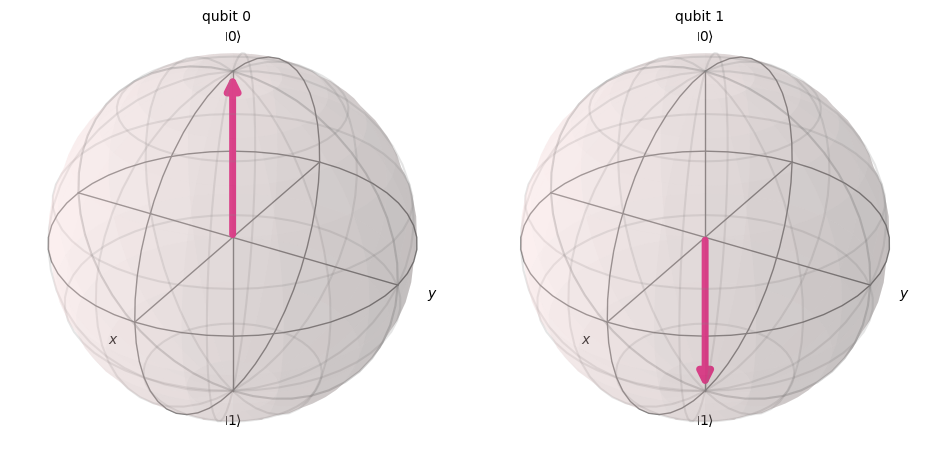

<IPython.core.display.Latex object>

In [11]:
qc = QuantumCircuit(2)
qc.x(1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))
unitary = Operator(qc).data
array_to_latex(unitary, prefix="U =")

we instead have $$
X\otimes I = 
\begin{bmatrix} 0 & I \\
               I & 0\\
\end{bmatrix}
$$

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

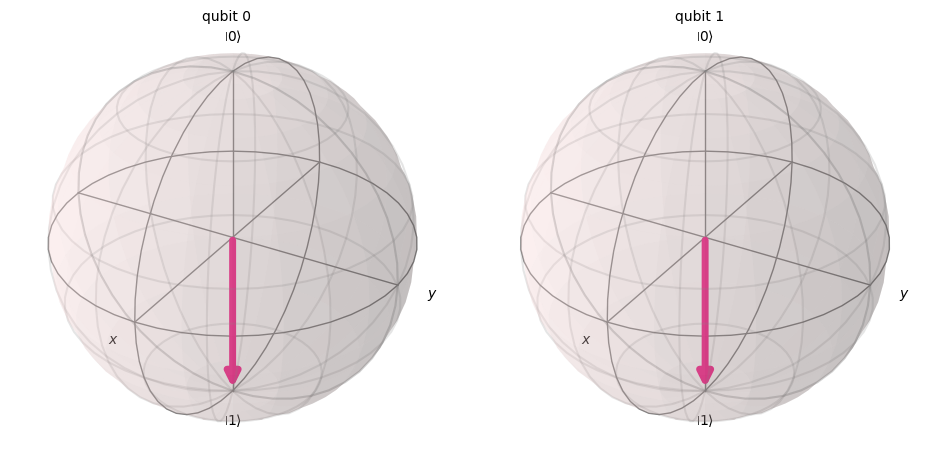

<IPython.core.display.Latex object>

In [14]:
#applying X to both qubits
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))
unitary = Operator(qc).data
array_to_latex(unitary, prefix="U =")

$$
X\otimes X = 
\begin{bmatrix} 0 & X \\
               X & 0\\
\end{bmatrix}
$$
and brings us to the state $| 1 \rangle \otimes | 1 \rangle$.

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

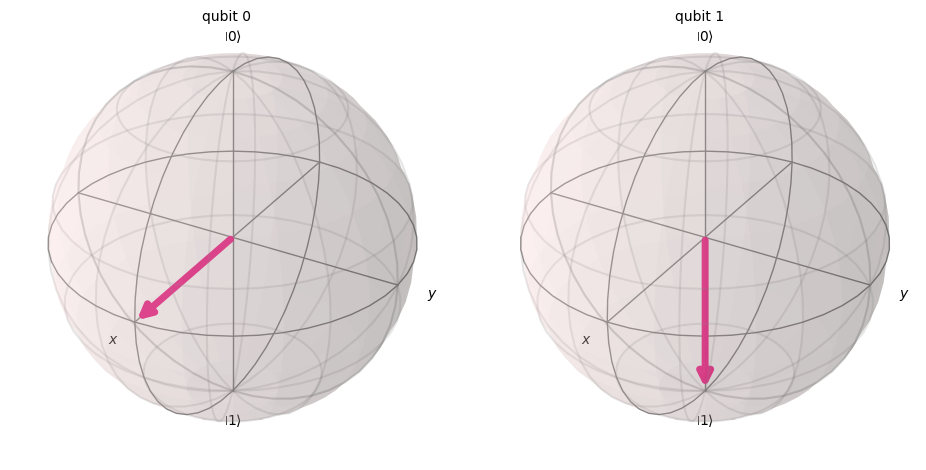

<IPython.core.display.Latex object>

In [17]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))
unitary = Operator(qc).data
array_to_latex(unitary, prefix="U =")

the operations is $$
X\otimes H = \begin{bmatrix} 0&H \\H&0 \end{bmatrix} 
$$

# CNOT
The most important two-qubit operation is the conditional-$NOT$, or conditional-$X$, usually writen as $CNOT$ or $CX$. If the control qubit is in state $|0\rangle $, don't do anything, if the control qubit is state $|1\rangle$, apply an $X$ operation to the target qubit.

In [20]:
qc = QuantumCircuit(2)
qc.cx(0,1)
display(qc.draw())
unitary = Operator(qc).data
array_to_latex(unitary, prefix="U =")

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

<IPython.core.display.Latex object>

 the state $| 0 \rangle \otimes | 0 \rangle$ unchanged: $$| 0 \rangle \otimes | 0 \rangle =  \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$

$$
\begin{bmatrix} 1 & 0 & 0 & 0 \\
                0 & 0 & 0 & 1 \\
                0 & 0 & 1 & 0 \\
                0 & 1 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
 = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$
and the state also $| 1 \rangle \otimes | 0 \rangle$ unchanged: $$| 1 \rangle \otimes | 0 \rangle =  \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}$$

$$
\begin{bmatrix} 1 & 0 & 0 & 0 \\
                0 & 0 & 0 & 1 \\
                0 & 0 & 1 & 0 \\
                0 & 1 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}
= \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}
$$

But the state $| 0 \rangle \otimes | 1 \rangle$ becomes $| 1 \rangle \otimes | 1 \rangle$ and vice-versa: $$| 0 \rangle \otimes | 1 \rangle =  \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}$$

$$
\begin{bmatrix} 1 & 0 & 0 & 0 \\
                0 & 0 & 0 & 1 \\
                0 & 0 & 1 & 0 \\
                0 & 1 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}
 = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} = | 1 \rangle \otimes | 1 \rangle
$$

$$
\begin{bmatrix} 1 & 0 & 0 & 0 \\
                0 & 0 & 0 & 1 \\
                0 & 0 & 1 & 0 \\
                0 & 1 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}
 = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} = | 0 \rangle \otimes | 1 \rangle
$$

However, the important point is that in general

$$
\begin{bmatrix} 1 & 0 & 0 & 0 \\
                0 & 0 & 0 & 1 \\
                0 & 0 & 1 & 0 \\
                0 & 1 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix} a \\ b \\ c \\ d \end{bmatrix}
 = \begin{bmatrix} a \\ d \\ c \\ b \end{bmatrix}$$

and this will work even if the qubits are not in computational basis states. Let's see what happens if we put the qubits into $| + \rangle$ and/or $| - \rangle$. First, $| + \rangle \otimes | + \rangle$. A circuit which generates this state looks like this:

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

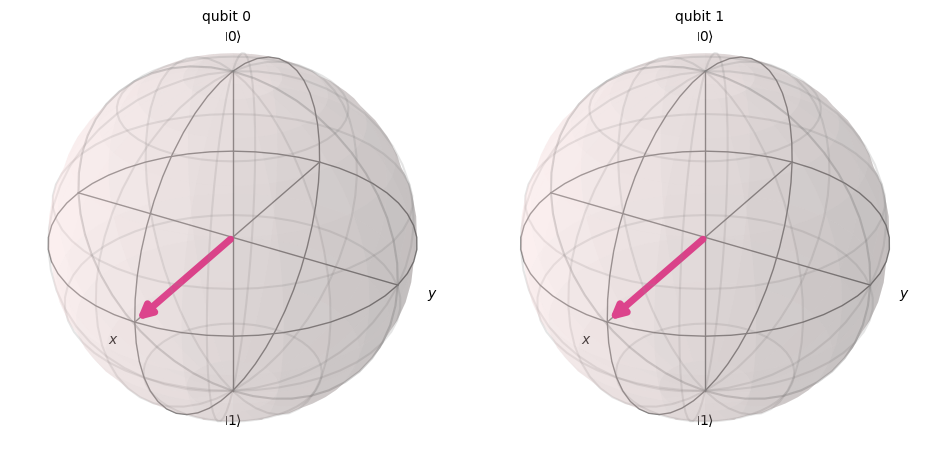

In [26]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

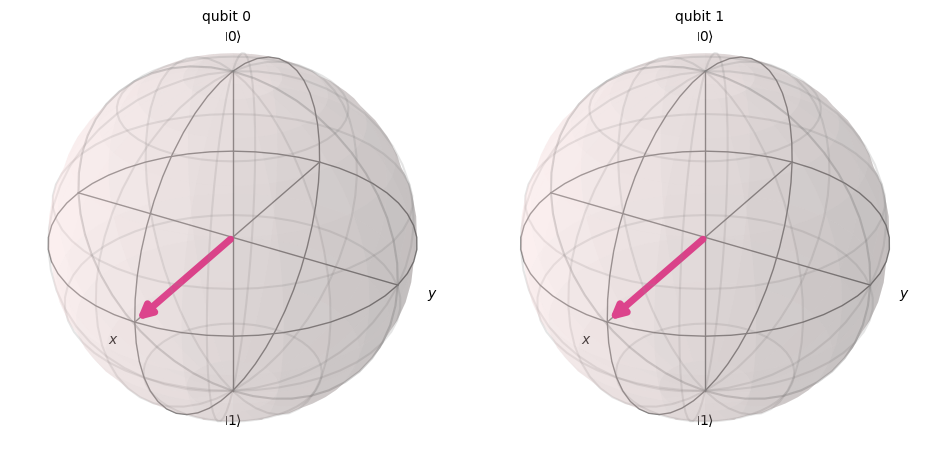

In [27]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

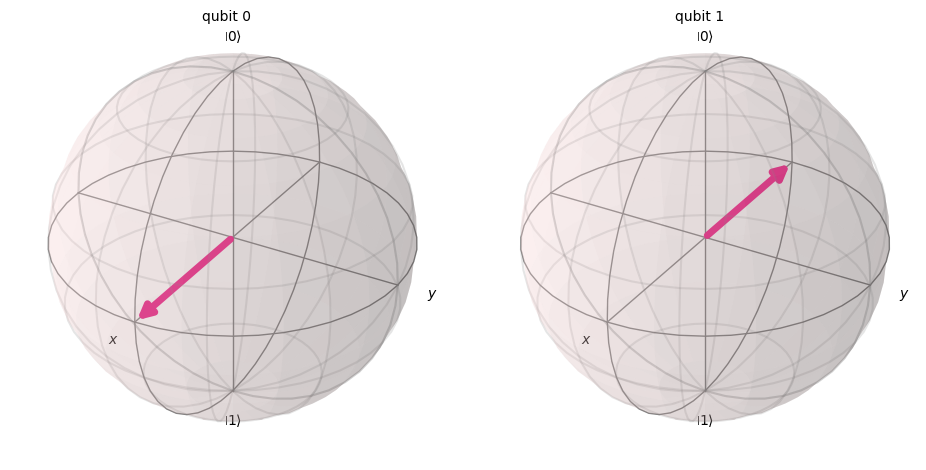

In [29]:
#applying a CX to |+> \otimes |->
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)

display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

┌───┐          
q_0: ┤ H ├───────■──
     ├───┤┌───┐┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

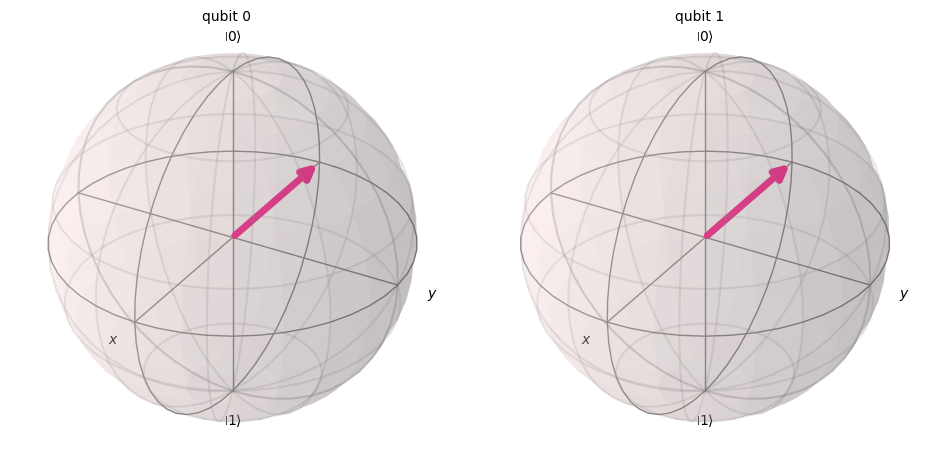

In [30]:
#applying a CX to |+> \otimes |->
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

actually flips the control qubit from $| + \rangle$ to $| - \rangle$ as if we had applied $Z$ to $q_0$, this incidentally the $CX$ can be called a Clifford gate, although it`s not generally possible to decompose it into the tensor product of single-qubit gates, all its possible operations are combination of Pauli gates.

┌───┐┌───┐
q_0: ┤ H ├┤ Z ├
     ├───┤├───┤
q_1: ┤ X ├┤ H ├
     └───┘└───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

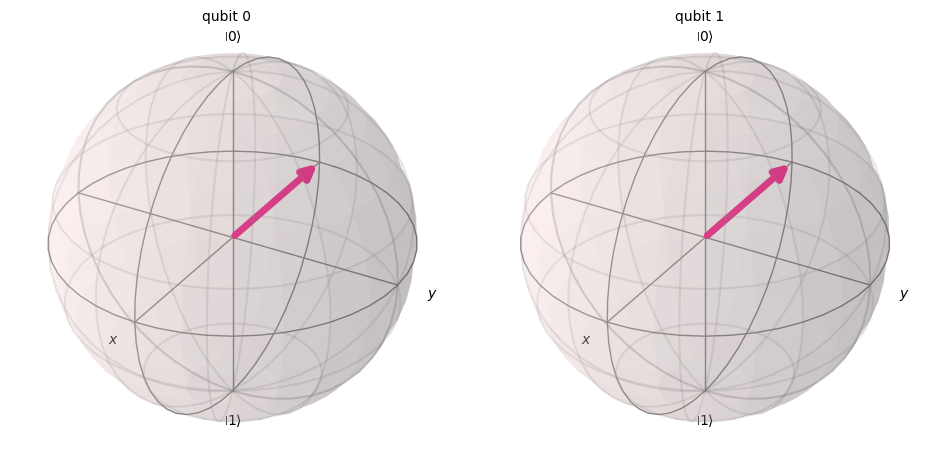

In [32]:
qc = QuantumCircuit(2)
qc.h(0)
qc.z(0)
qc.x(1)
qc.h(1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     ├───┤└───┘
q_1: ┤ H ├─────
     └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

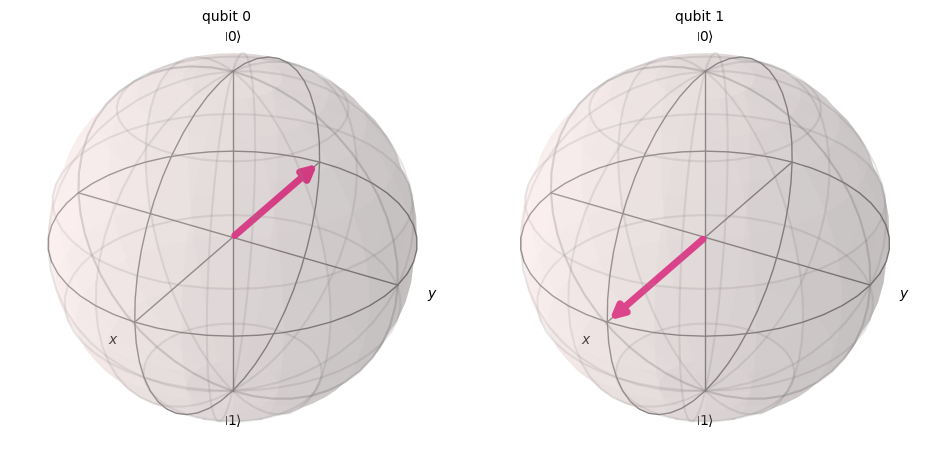

In [34]:
#applying CX to |-> \otimes |+>
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.h(1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     ├───┤└───┘┌─┴─┐
q_1: ┤ H ├─────┤ X ├
     └───┘     └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

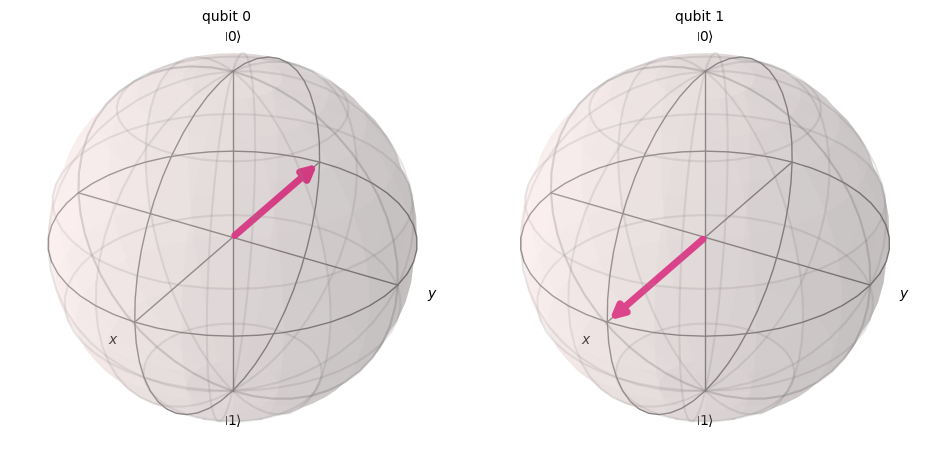

In [35]:
#applying CX to |-> \otimes |+>
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

This is called "phase kickback" and useful for two important reasons. Firstly, if our hardware has a $CX$ implementation which only works one way around, i.e. with $q_0$ as the control and $q_1$ as the target, we can implement the $CX$ with $q_1$ as the control and $q_0$ as the target by using the $H$ to switch in and out of the $X$ and $Z$ bases.

When the target qubit is in the $|+\rangle$ state, a CNOT gate does not produce phase kickback because $|+\rangle$ is an eigenstate of $X$ with eigenvalue +1.

In [36]:
#CX gate also can be used as the control gate is |0>
qc = QuantumCircuit(2)
qc.cx(0,1,ctrl_state=0)
display(qc.draw())
qc = QuantumCircuit(2)
qc.x(0)
qc.cx(0,1,ctrl_state=1)
qc.x(0)
display(qc.draw())

q_0: ──o──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├─────
          └───┘

# entanglement
When the control qubit is in superposition, like the state $|0+\rangle$

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

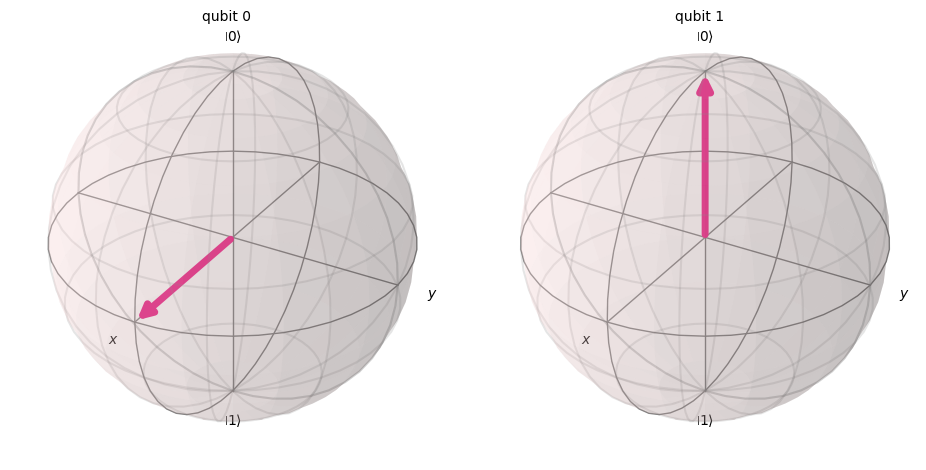

In [37]:
qc = QuantumCircuit(2)
qc.h(0)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

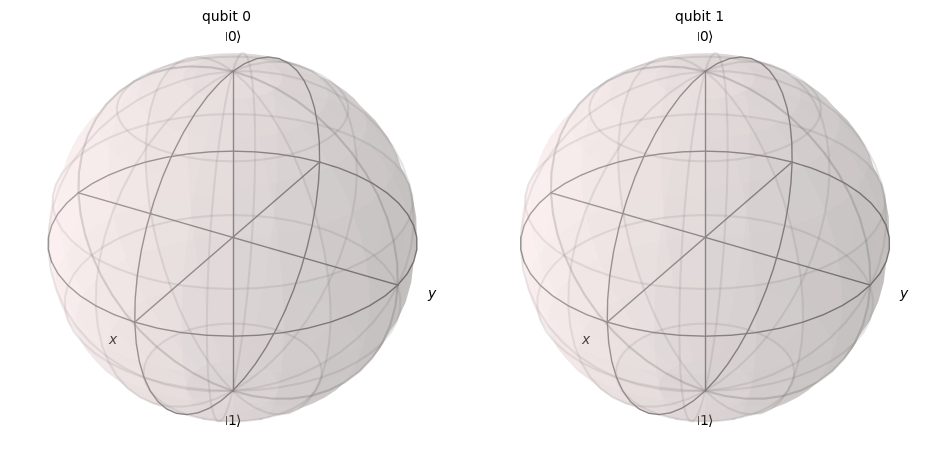

In [39]:
# perform CX|0+> ,|+> as control and |0> as target
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

the representation in terms of the two bloch spheres for the two qubits now makes no sense. we can interpret this via the "partial trace" operation described in the *density-matrix*, it turns out that the Bloch vectors both have the length zero.The output state vector, 
$$\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix}$$
can be described as $$\frac{1}{\sqrt{2}} \left( \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} +  \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}\right)$$
i.e. $$\frac{1}{\sqrt{2}} \left( |00\rangle + |11\rangle \right)$$

This state however cannot be described as the tensor product between two qubit states. We know both qubits are in the same state, but we don't know whether they are both 0 or both 1. Or rather, we would get $|00\rangle$ half the time and $|11\rangle$ the other half. Previously we saw that we could put a single qubit into a superposed state of $|0\rangle$ and $|1\rangle$, now we have put a two-qubit state into a superposition of $|00\rangle$ and $|11\rangle$:


┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

{np.str_('00'): np.float64(0.5), np.str_('11'): np.float64(0.5)}


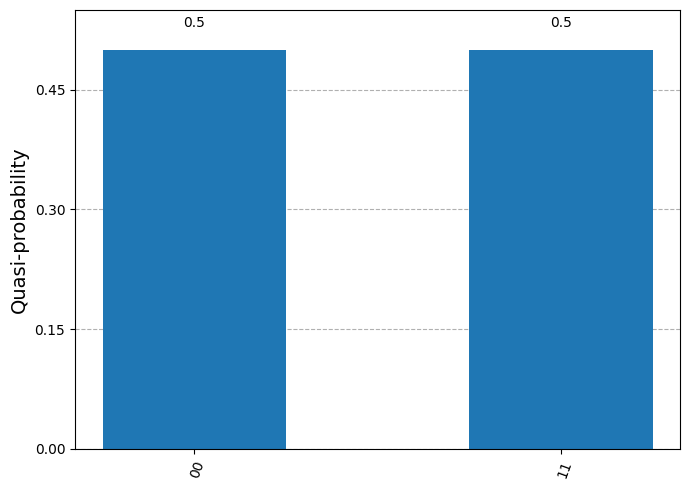

In [40]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
display(qc.draw())
svsim = Aer.get_backend('statevector_simulator')
result = svsim.run(qc).result()
print(result.get_counts())
plot_distribution(result.get_counts())

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

{'11': 492, '00': 508}


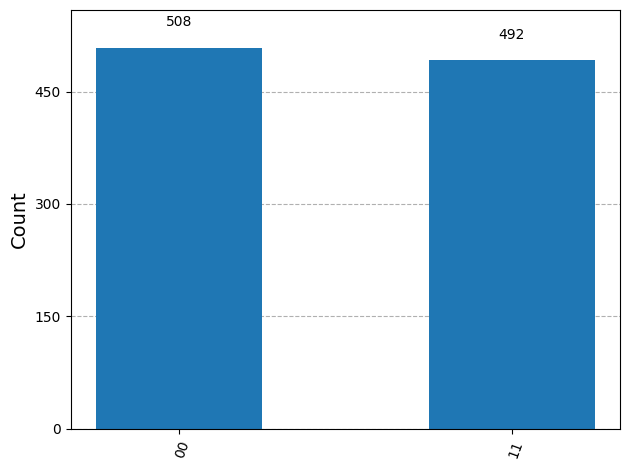

In [41]:
#to see what would happen if we actually try to measure the qubit, we add two classical bits and simulate running the circuit multiple times:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
display(qc.draw())
backend = Aer.get_backend('qasm_simulator') # the device to run on
result = backend.run(qc, shots=1000).result()
print(result.get_counts())
plot_histogram(result.get_counts())

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

{'00': 1}


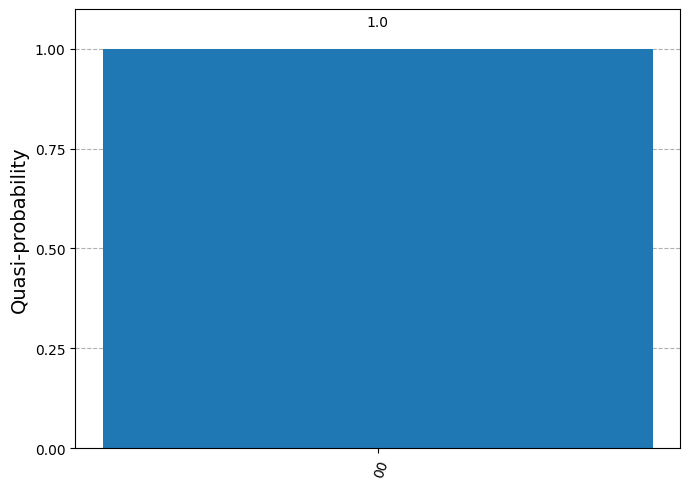

In [44]:
#once we measure one qubit in terms of the computation basis, we will immediately know the state of the other one: the qubits are entangled. We can see this by looking at the state vector after the measurements have been performed to see that it has collapsed to either |00> or |11>
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
display(qc.draw())
svism = Aer.get_backend('statevector_simulator')
result = svism.run(qc).result()
print(result.get_counts())
plot_distribution(result.get_counts())

We can't seem to show that the measurement on only one qubit collapses the other one, since the addition of the classical registers stops us from obtaining the distribution of "quasi-probability

{'00': 1}


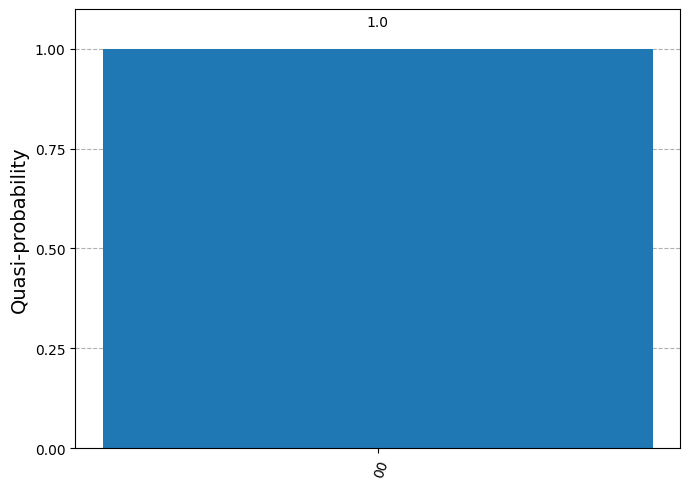

In [45]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
#qc.measure(0,0)
#qc.measure(1,1)
qc.draw()
svsim = Aer.get_backend('statevector_simulator')
result = svsim.run(qc).result()
print(result.get_counts())
plot_distribution(result.get_counts())

# a note on entanglement
from prof.Chrastina Daniel

It should be noted that the situation in which the final state of our qubits is any kind of superposition (either a separable state of superposed qubits or an entangled state), is basically useless. We can only read out computational basis states, so we should aim to have our algorithm arrive at computational basis states as deterministically as possible.

Nobody even knows how to interpret the "collapse of the wavefunction" from a superposed state into an eigenstate of an operator when a measurement is carried out, let alone how to consider it physically, so there is no useful physical insight to be gained from collapsing a superposed or entangled state. At best, an entangled output would indicate multiple possible solutions to whatever algorithm we were running, but we would not be aware that our output were entangled unless we ran the algorithm multiple times. Then we note that having to run our algorithm multiple times may start to erode any supposed quantum advantage over a classical algorithm. However in many cases it may be that candidate solutions produced by a quantum algorithm can be quickly checked by classical computation.

This is to say that as far as I can tell, just about all the algorithms (apart from the Grover search) we will look at will involve separable states of qubits in superposed states, and if entanglement arises it will be an unwanted feature. Certainly we would want to avoid entanglement in our final state.

On the other hand, there may be entanglement at a lower level, involved in the physical realization of the qubit states themselves.

# SWAP gates
It's useful for more than just moving qubit states around until they're adjacent and can therefore interact.
Besides, qiskit doesn't have the $\sqrt{\mathrm{SWAP}}$ gate, because IBM's qubits don't exploit the exchange interaction. That means we would either need to create it from gates which qiskit actually  

In [47]:
qc = QuantumCircuit(2)
qc.swap(0,1)
display(qc.draw())
unitary = Operator(qc).data
array_to_latex(unitary, prefix="U =")

q_0: ─X─
      │ 
q_1: ─X─

<IPython.core.display.Latex object>

In [49]:
#the SSWAP
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.h(0)
qc.t(0)
qc.tdg(1)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
qc.tdg(0)
qc.h(0)
qc.cx(0,1)
qc.sdg(0)
qc.s(1)
display(qc.draw())
unitary = Operator(qc).data
array_to_latex(unitary, prefix="U =")

┌───┐ ┌───┐┌───┐     ┌───┐┌─────┐┌───┐     ┌─────┐
q_0: ──■───┤ H ├─┤ T ├┤ H ├──■──┤ H ├┤ Tdg ├┤ H ├──■──┤ Sdg ├
     ┌─┴─┐┌┴───┴┐├───┤└───┘┌─┴─┐├───┤└─────┘└───┘┌─┴─┐└┬───┬┘
q_1: ┤ X ├┤ Tdg ├┤ H ├─────┤ X ├┤ H ├────────────┤ X ├─┤ S ├─
     └───┘└─────┘└───┘     └───┘└───┘            └───┘ └───┘

<IPython.core.display.Latex object>

In [65]:
#the SSWAP.  define the gate directly as a general unitary operator

from qiskit.quantum_info.operators import Operator

SSWAP = Operator([[1,0,0,0],[0,(1+1.j)/2,(1-1.j)/2,0],[0,(1-1.j)/2,(1+1.j)/2,0],[0,0,0,1]])
display(array_to_latex(SSWAP, prefix="SSWAP = "))
qc = QuantumCircuit(2)
qc.append(SSWAP, [0, 1])
display(qc.draw())

qc.tdg(0)
qc.t(1)
display(qc.draw())
unitary = Operator(qc).data
array_to_latex(unitary, prefix="U =")

<IPython.core.display.Latex object>

┌──────────┐
q_0: ┤0         ├
     │  Unitary │
q_1: ┤1         ├
     └──────────┘

┌──────────┐┌─────┐
q_0: ┤0         ├┤ Tdg ├
     │  Unitary │└┬───┬┘
q_1: ┤1         ├─┤ T ├─
     └──────────┘ └───┘

<IPython.core.display.Latex object>

the SSWAP gate has the function that

$|00\rangle \rightarrow |00\rangle$

$|11\rangle \rightarrow |11\rangle$

$|01\rangle \rightarrow  \frac{1+i}{2} |01\rangle +  \frac{1-i}{2} |01\rangle$

$|00\rangle \rightarrow \frac{1-i}{2} |01\rangle +  \frac{1+i}{2} |01\rangle$


In [53]:
#apply the |00> to the state
qc = QuantumCircuit(2)
#qc.x(0)
#qc.x(1)
state = Statevector(qc)
# display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
# display(state.draw(output = 'bloch'))
qc.append(SSWAP, [0, 1])
state = Statevector(qc)
# display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
# display(state.draw(output = 'bloch'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [54]:
#apply the |10> to the state
qc = QuantumCircuit(2)
qc.x(0)
#qc.x(1)
state = Statevector(qc)
# display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
# display(state.draw(output = 'bloch'))
qc.append(SSWAP, [0, 1])
state = Statevector(qc)
# display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
# display(state.draw(output = 'bloch'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [57]:
#apply the |01> to the state
qc = QuantumCircuit(2)
#qc.x(0)
qc.x(1)
state = Statevector(qc)
# display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
# display(state.draw(output = 'bloch'))
qc.append(SSWAP, [0, 1])
state = Statevector(qc)
# display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
# display(state.draw(output = 'bloch'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [58]:
#apply the |11> to the state
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
state = Statevector(qc)
# display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
# display(state.draw(output = 'bloch'))
qc.append(SSWAP, [0, 1])
state = Statevector(qc)
# display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
# display(state.draw(output = 'bloch'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

in a circuit ,the $T$ gates remove some phase shifts so that the outpot is more clear:

┌───┐┌──────────┐┌─────┐
q_0: ┤ X ├┤0         ├┤ Tdg ├
     └───┘│  Unitary │└┬───┬┘
q_1: ─────┤1         ├─┤ T ├─
          └──────────┘ └───┘ 
c: 2/════════════════════════

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

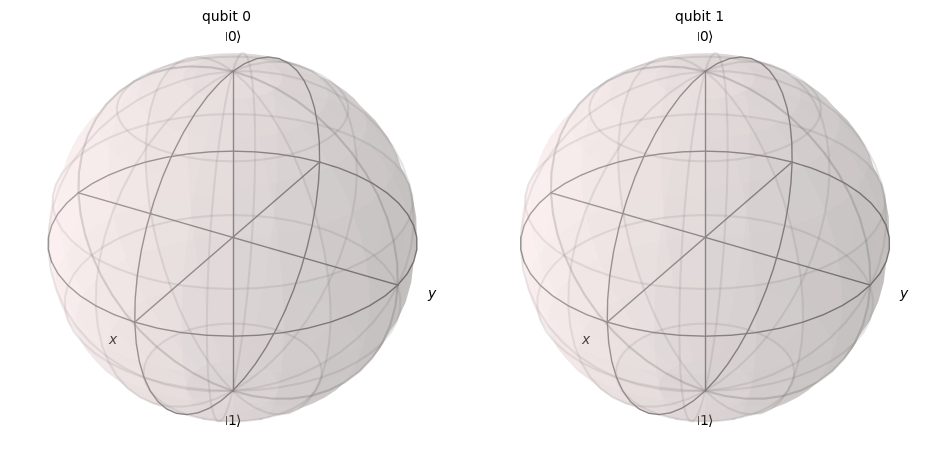

In [59]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.append(SSWAP, [0, 1])
qc.tdg(0)
qc.t(1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

┌───┐┌──────────┐┌─────┐
q_0: ┤ X ├┤0         ├┤ Tdg ├
     └───┘│  Unitary │└┬───┬┘
q_1: ─────┤1         ├─┤ T ├─
          └──────────┘ └───┘

{np.str_('01'): np.float64(0.5), np.str_('10'): np.float64(0.5)}


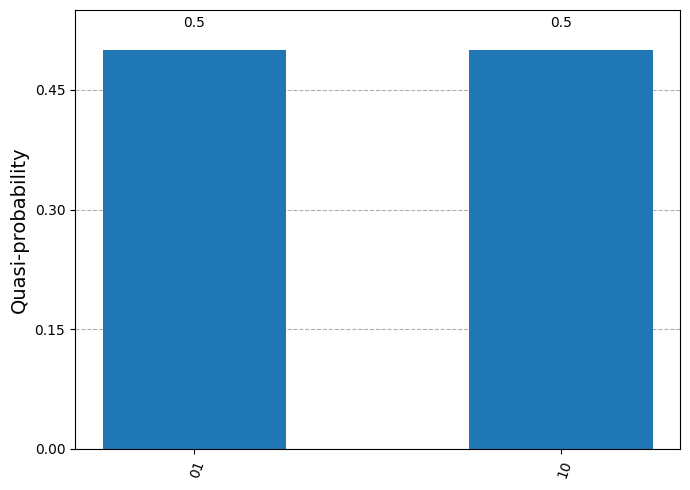

In [63]:
qc = QuantumCircuit(2)
qc.x(0)
qc.append(SSWAP, [0, 1])
#qc.tdg(0)
#qc.t(1)
display(qc.draw())
svsim = Aer.get_backend('statevector_simulator')
result = svsim.run(qc).result()
print(result.get_counts())
plot_distribution(result.get_counts())

┌───┐┌──────────┐┌─────┐
q_0: ┤ X ├┤0         ├┤ Tdg ├
     └───┘│  Unitary │└┬───┬┘
q_1: ─────┤1         ├─┤ T ├─
          └──────────┘ └───┘ 
c: 2/════════════════════════

{'01': 514, '10': 486}


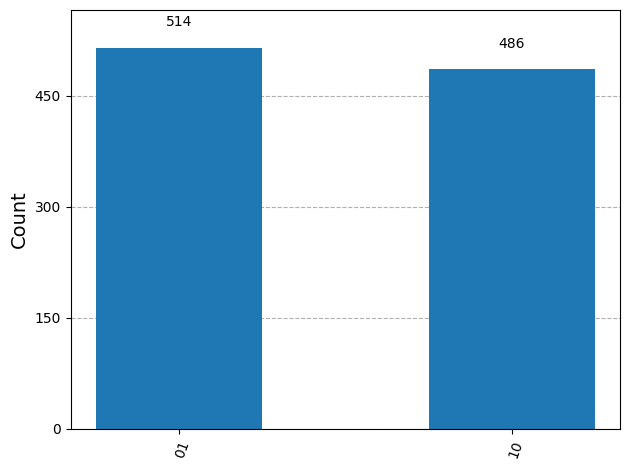

In [64]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.append(SSWAP, [0, 1])
qc.tdg(0)
qc.t(1)
display(qc.draw())
qc.measure(0,0)
qc.measure(1,1)
backend = Aer.get_backend('qasm_simulator') # the device to run on
result = backend.run(qc, shots=1000).result()
print(result.get_counts())
plot_histogram(result.get_counts())

apply the $\sqrt{\mathrm{SWAP}}$ twice to show that it this gives a $SWAP$:

In [66]:
qc = QuantumCircuit(2)
qc.append(SSWAP, [0, 1])
qc.append(SSWAP, [0, 1])
unitary = Operator(qc).data
array_to_latex(unitary, prefix="U =")

<IPython.core.display.Latex object>

include the $T$ gates we get:

In [67]:
qc = QuantumCircuit(2)
qc.append(SSWAP, [0, 1])
qc.tdg(0)
qc.t(1)
qc.append(SSWAP, [0, 1])
qc.tdg(0)
qc.t(1)
display(qc.draw())
unitary = Operator(qc).data
array_to_latex(unitary, prefix="U =")

┌──────────┐┌─────┐┌──────────┐┌─────┐
q_0: ┤0         ├┤ Tdg ├┤0         ├┤ Tdg ├
     │  Unitary │└┬───┬┘│  Unitary │└┬───┬┘
q_1: ┤1         ├─┤ T ├─┤1         ├─┤ T ├─
     └──────────┘ └───┘ └──────────┘ └───┘

<IPython.core.display.Latex object>

also the $SWAP$ gate can be rendered as :

In [68]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
display(qc.draw())
unitary = Operator(qc).data
array_to_latex(unitary, prefix="U =")

┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘

<IPython.core.display.Latex object>

# Controlled-phase gate

The single-qubit phase gate rotates the state in the $x-y$ plane of the Bloch sphere

┌───┐
q: ┤ H ├
   └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

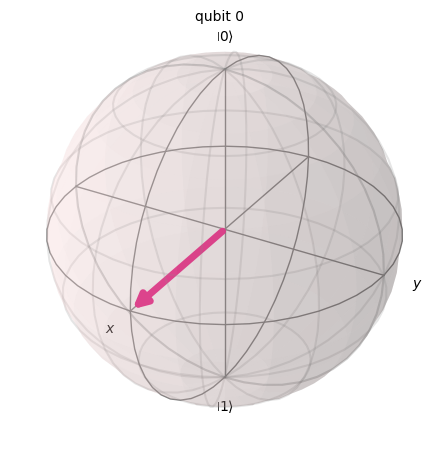

In [70]:
qc = QuantumCircuit(1)
qc.h(0)
display(qc.draw())

state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

┌───┐┌────────┐
q: ┤ H ├┤ P(π/8) ├
   └───┘└────────┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

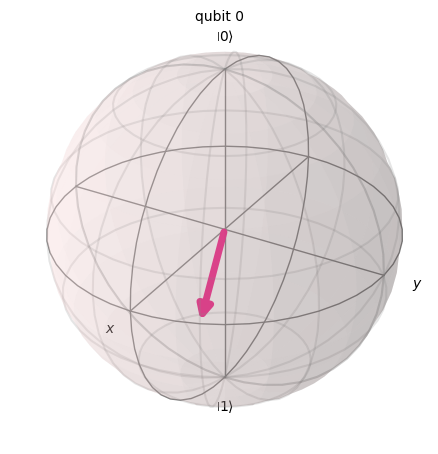

In [71]:
qc = QuantumCircuit(1)
qc.h(0)
qc.p(pi/8,0)
display(qc.draw())

state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

a rotation $\phi$ on the initial state $\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix}$ becomes $\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}e^{i\phi} \end{bmatrix}$ = $\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}(\cos \phi + i \sin \phi) \end{bmatrix}$.


The controlled-phase gate applies this specified rotation $\phi$ to the target qubit if the control qubit is $|1\rangle$ but not $|0\rangle$:

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

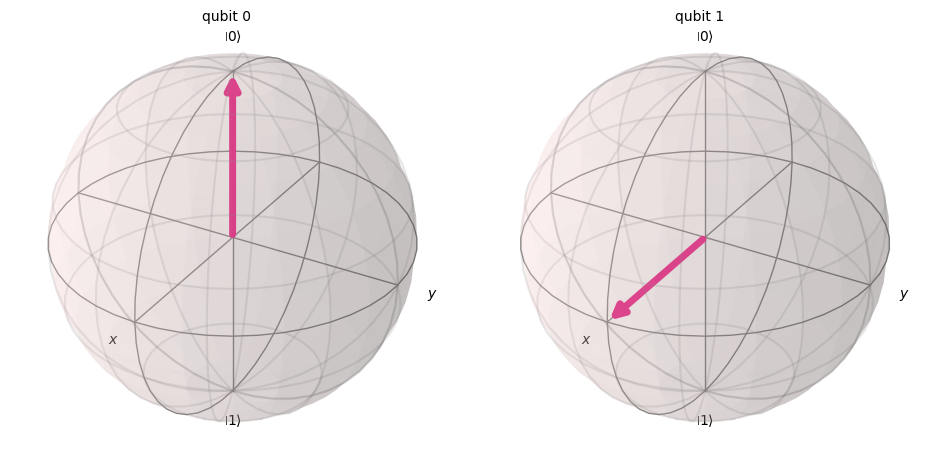

In [73]:
qc = QuantumCircuit(2)
qc.h(1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

┌───┐         
q_0: ┤ X ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ H ├─■───────
     └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

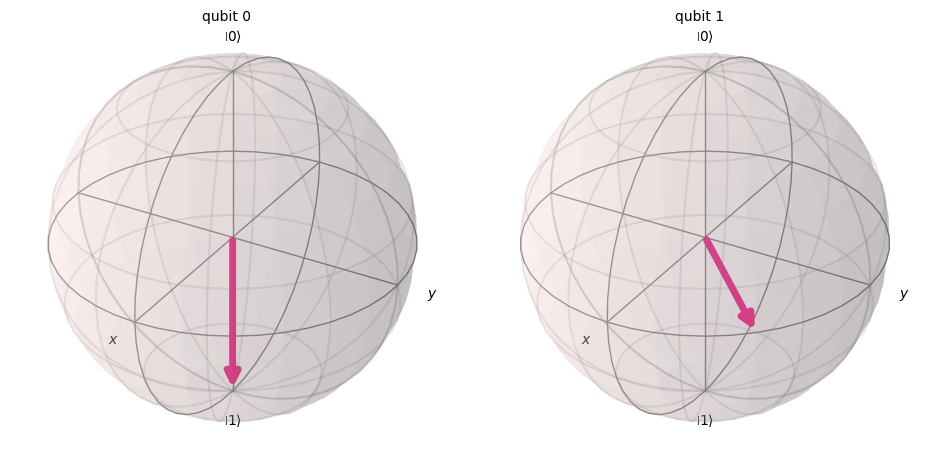

In [79]:
qc = QuantumCircuit(2)
qc.x(0)
qc.h(1)
qc.cp(pi/4,0,1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

The unitary of the controlled phase gate corresponding to a rotation of $\pi/4$ on qubit 1 controlled by qubit 0 is:

In [82]:
qc = QuantumCircuit(2)
qc.cp(pi/4,0,1)
display(qc.draw())
unitary = Operator(qc).data
array_to_latex(unitary, prefix="\\text{Controlled-phase}(\\pi/4,0,1) =")

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

<IPython.core.display.Latex object>

In [85]:
#We notice however that the circuit symbol does not distinguish control and target.
#In fact, if we connect the gate the other way around, the unitary is the same.
qc = QuantumCircuit(2)
qc.cp(pi/4,1,0)
display(qc.draw())
unitary = Operator(qc).data
array_to_latex(unitary, prefix=r"(\pi/4,1,0) =")

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

<IPython.core.display.Latex object>

 if we prepare the qubits the other way around it is anyway the qubit in the superposed state which is rotated. Of course, phase rotations of the pure $|0\rangle$ and $|1\rangle$ states cannot be observed. To see an effect we just need some amplitude in the last element of the state vector plus at least one other element (else we are just changing the global phase).

Consider 
$$ 
|1+\rangle = |1\rangle \otimes |+\rangle= \begin{bmatrix} 0 \\ 1 \end{bmatrix} \otimes \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}  = \frac{1}{\sqrt{2}}\begin{bmatrix} 0 \times \begin{bmatrix} 1 \\ 1 \end{bmatrix} \\ 1 \times \begin{bmatrix} 1 \\ 1 \end{bmatrix} \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 0 \\ 0 \\ 1 \\ 1 \end{bmatrix}
$$

and now consider
$$ 
|+1\rangle = |+\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \times \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\ 1 \times \begin{bmatrix} 0 \\ 1 \end{bmatrix} \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 0 \\ 1 \\ 0 \\ 1 \end{bmatrix}
$$

The controlled-phase gate applies a phase $\phi$ to the last element, so these two states become
$$ 
\frac{1}{\sqrt{2}}\begin{bmatrix} 0 \\ 0 \\ 1 \\ e^{i\phi} \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 0 \times \begin{bmatrix} 1 \\ e^{i\phi} \end{bmatrix} \\ 1 \times \begin{bmatrix} 1 \\ e^{i\phi} \end{bmatrix} \end{bmatrix} = 
\begin{bmatrix} 0 \\ 1 \end{bmatrix} \otimes \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ e^{i\phi} \end{bmatrix}$$
and
$$ 
\frac{1}{\sqrt{2}}\begin{bmatrix} 0 \\ 1 \\ 0 \\ e^{i\phi} \end{bmatrix}= \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \times \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\ e^{i\phi} \times \begin{bmatrix} 0 \\ 1 \end{bmatrix} \end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ e^{i\phi} \end{bmatrix} \otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

The same unitary rotates the phase of whichever qubit was in $|+\rangle$ as long as the other is $|1\rangle$.

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ X ├─■───────
     └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

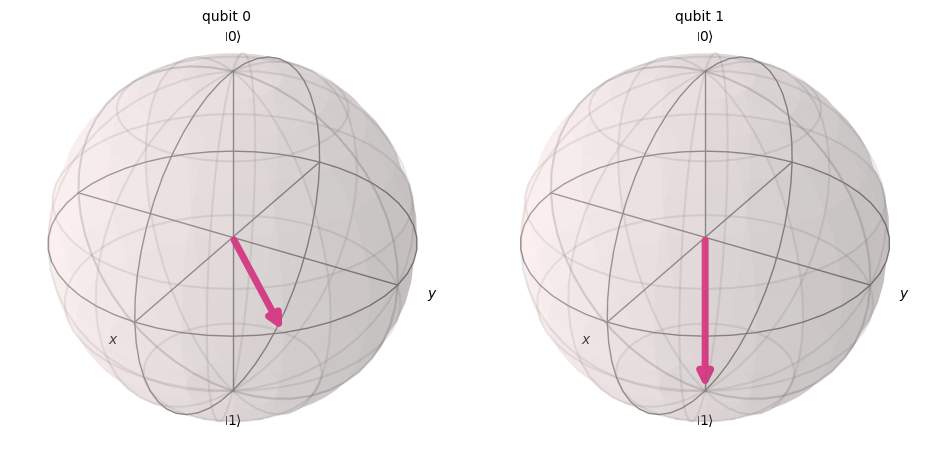

In [92]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(pi/4,0,1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

#in general the controlled-phase gate is actually rotating both qubits

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ H ├─■───────
     └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

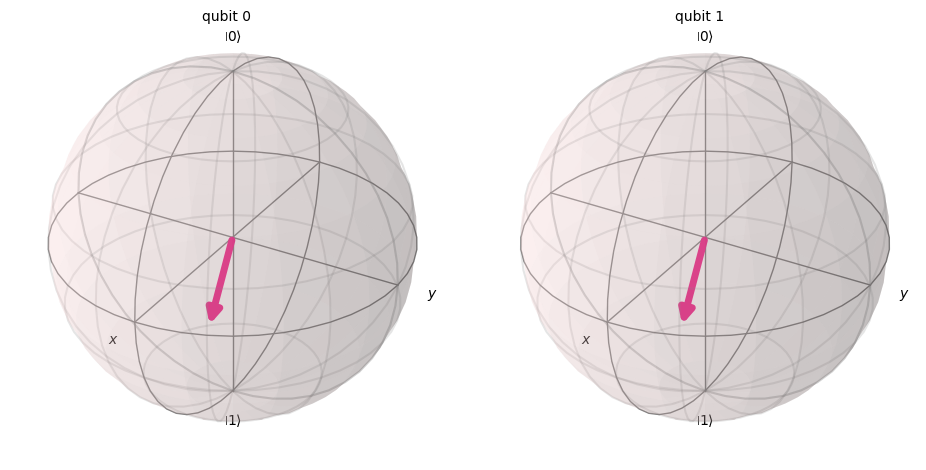

In [93]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cp(pi/4,0,1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

It's not obvious for this $\phi$ that this state is no longer separable. The Bloch vectors are actually inside the spheres rather than on their surfaces. See *density-matrix-2*

If we apply a conditional phase $\pi$ (which can also be called a controlled-$Z$) and then $H$,

┌───┐            
q_0: ┤ H ├─■──────────
     ├───┤ │P(π) ┌───┐
q_1: ┤ H ├─■─────┤ H ├
     └───┘       └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

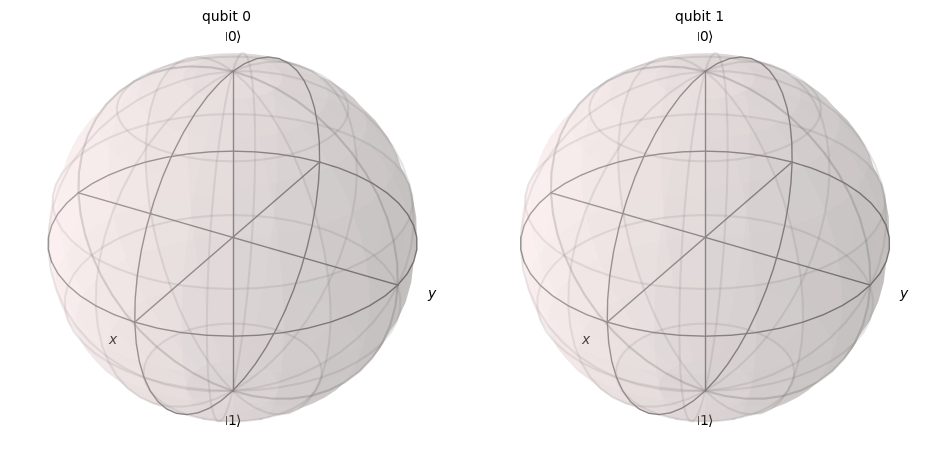

In [94]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cp(pi,0,1)
qc.h(1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

we now have a superposition between $|00\rangle$ and $|11\rangle$, which is the same as produced by this circuit:

so in So in conjuction with $H$ gates, the controlled-$Z$ gate can perform the controlled-$X$ operation.

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

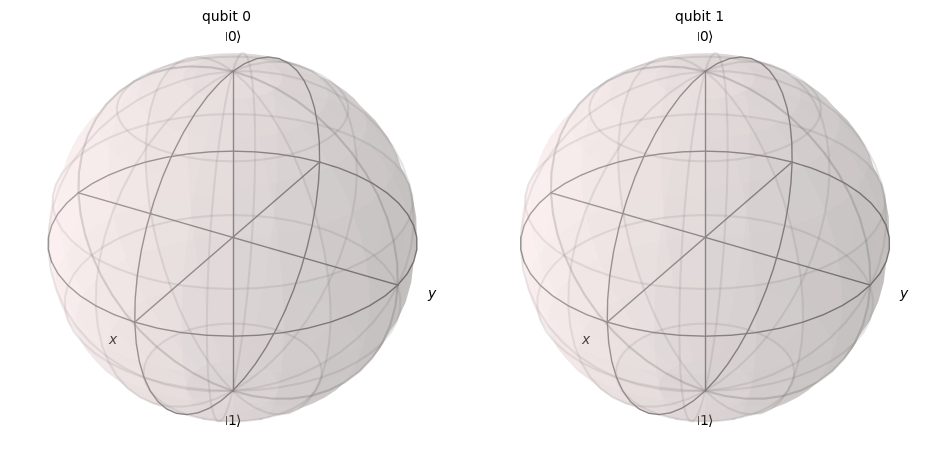

In [96]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
display(qc.draw())
state = Statevector(qc)
display(state.draw(output = 'latex'))
display(Math(vector_to_latex(state)))
display(state.draw(output = 'bloch'))

In [97]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cz(0,1)
qc.h(1)
display(qc.draw())
unitary = Operator(qc).data
array_to_latex(unitary, prefix="U =")

┌───┐        
q_0: ┤ H ├─■──────
     ├───┤ │ ┌───┐
q_1: ┤ H ├─■─┤ H ├
     └───┘   └───┘

<IPython.core.display.Latex object>

In [98]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
display(qc.draw())
unitary = Operator(qc).data
array_to_latex(unitary, prefix="U =")

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

<IPython.core.display.Latex object>